In [2]:
import pandas as pd
import numpy as np
import gc
from tqdm import tqdm
import sys
tqdm.pandas()
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import plotly.graph_objects as go
from skimage import io

# EDA

In [33]:
articles = pd.read_csv("./dataset/articles.csv")
customers = pd.read_csv("./dataset/customers.csv")
transactions = pd.read_csv("./dataset/transactions_train.csv")

In [15]:
articles.shape

(105542, 25)

In [16]:
customers.shape

(1371980, 7)

In [4]:
transactions.shape

(3000000, 5)

In [34]:
import matplotlib.ticker as mtick

def plot_bar(database, col, figsize=(13,5), pct=False, label='items'):
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f6f6f6')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show()

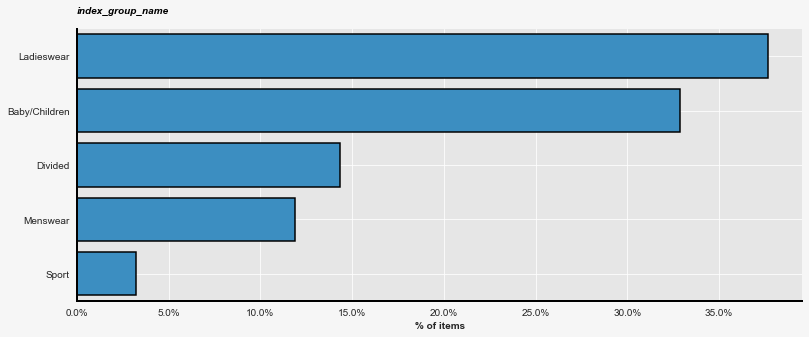

In [6]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(articles, 'index_group_name', pct=True)

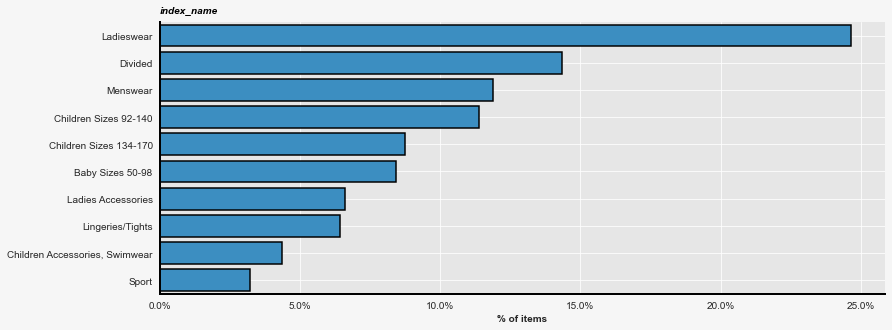

In [5]:
plot_bar(articles, 'index_name', pct=True)

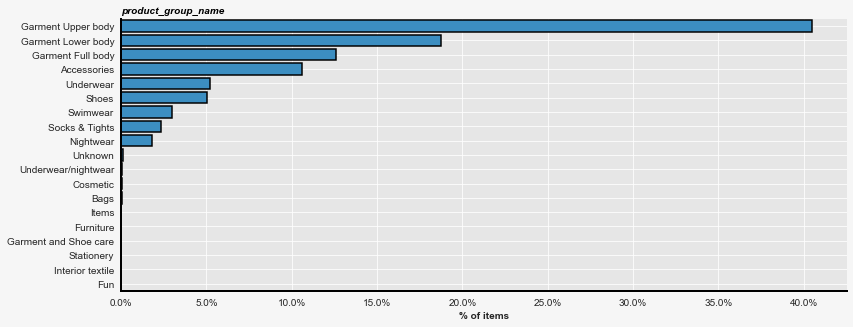

In [11]:
plot_bar(articles, 'product_group_name', pct=True)

In [9]:
data = articles['product_group_name'].value_counts()
data = data.div(data.sum()).mul(100)
pareto = data.cumsum().rename('cumulative_pct')
pareto

Garment Upper body        40.496674
Garment Lower body        59.268348
Garment Full body         71.862387
Accessories               82.434481
Underwear                 87.636202
Shoes                     92.641792
Swimwear                  95.604593
Socks & Tights            97.918364
Nightwear                 99.717648
Unknown                   99.832294
Underwear/nightwear       99.883459
Cosmetic                  99.929886
Bags                      99.953573
Items                     99.969680
Furniture                 99.981998
Garment and Shoe care     99.990525
Stationery                99.995263
Interior textile          99.998105
Fun                      100.000000
Name: cumulative_pct, dtype: float64

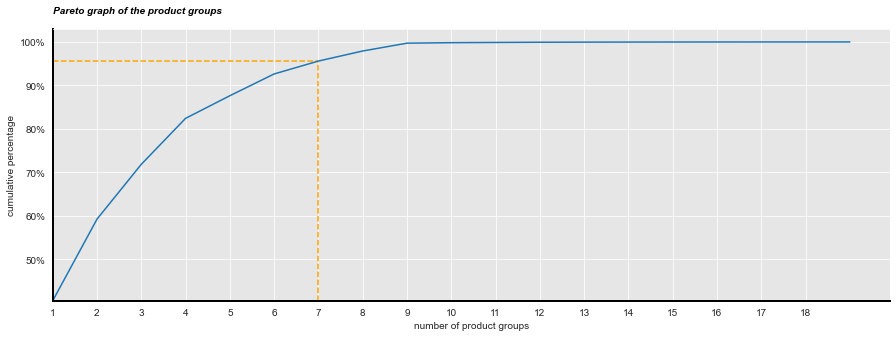

In [10]:
data = pareto.reset_index()
data.columns = ['group', 'cumulative_pct']
data.index += 1
data['cumulative_pct'][6]/100
fig, ax = plt.subplots(figsize=(15,5))

data = pareto.reset_index()
data.columns = ['features', 'cumulative_pct']
data.index += 1

sns.lineplot(data=data, x=data.index, y='cumulative_pct')

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
    
ax.set_xticks(pareto.reset_index().index)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('cumulative percentage')
ax.set_xlabel('number of product groups')
ax.set_xlim(1)
ax.set_ylim(data['cumulative_pct'][1])

ax.vlines(7, data['cumulative_pct'][1], data['cumulative_pct'][7], color='orange', ls='--')
ax.hlines(data['cumulative_pct'][7], 1, 7, color='orange', ls='--')
ax.text(0, 1.05, 'Pareto graph of the product groups', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic', transform=ax.transAxes)
plt.show()

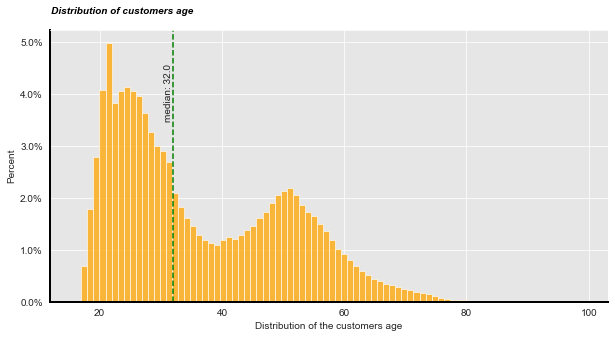

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=customers['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
median = customers['age'].median()
ax.axvline(x=median, color="green", ls="--")
ax.text(median, 3.5, 'median: {}'.format(round(median,1)), rotation='vertical', ha='right')
ax.text(12, 5.5, 'Distribution of customers age', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
plt.show()

In [12]:
print('The olders customer is {} years old.'.format(customers['age'].max()))

The olders customer is 99.0 years old.


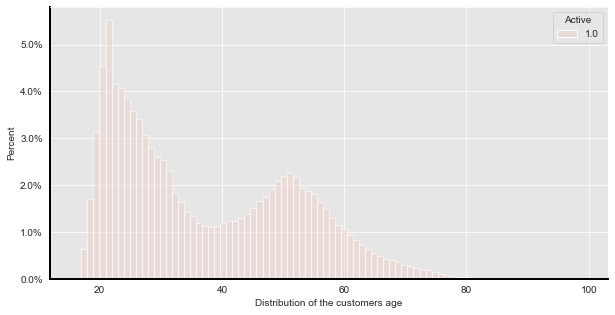

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=customers['age'].nunique(), hue='Active', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

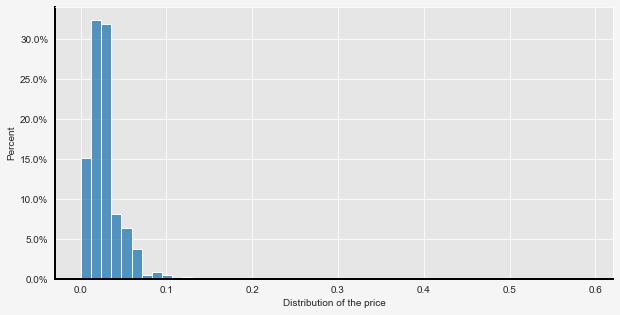

In [16]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=transactions, x='price', bins=50, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

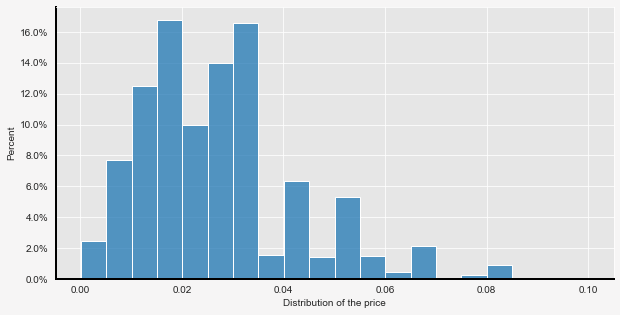

In [25]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = transactions[transactions['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [26]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [35]:
def set_gender_flg(x):
    female_pro_types = [
        "Bra",
        "Underwear Tights",
        "Leggings/Tights",
        "Hair clip",
        "Hair string",
        "Hair/alice band",
        "Bikini top",
        "Skirt",
        "Dress",
        "Earring",
        "Alice band",
        "Straw hat",
        "Necklace",
        "Ballerinas",
        "Blouse",
        "Beanie",
        "Giftbox",
        "Pumps",
        "Bootie",
        "Heeled sandals",
        "Nipple covers",
        "Hair ties",
        "Underwear corset",
        "Bra extender",
        "Underdress",
        "Underwear set",
        "Sarong",
        "Leg warmers",
        "Hairband",
        "Tote bag",
        "Earrings",
        "Flat shoes",
        "Heels",
        "Cap",
        "Shoulder bag",
        "Headband",
        "Baby Bib",
        "Cross-body bag",
        "Bumbag",
    ]
    x["gender"] = 0 # * 0 for not divided, 1 for male, 2 for female
    if x["index_group_name"] == "Ladieswear":
        x["gender"] = 2
    elif x["index_group_name"] == "Menswear":
        x["gender"] = 1
    else:
        if (
            "boy" in x["department_name"].lower()
            or "men" in x["department_name"].lower()
        ):
            x["gender"] = 1
        if (
            "girl" in x["department_name"].lower()
            or "ladies" in x["department_name"].lower()
            or x["product_type_name"] in female_pro_types
        ):
            x["gender"] = 2
    return x

In [36]:
item = articles.progress_apply(set_gender_flg, axis=1)

100%|██████████| 105542/105542 [01:35<00:00, 1108.31it/s]


In [37]:
trans = transactions.merge(customers[['customer_id','postal_code']], on='customer_id', how='left')
trans = pd.merge(trans, item[['article_id','gender','product_type_name']], on='article_id', how='left')
trans['t_dat'] = pd.to_datetime(trans['t_dat'])
trans['YYYY_MM'] = trans['t_dat'].dt.year.astype(str) + '_' + trans['t_dat'].dt.month.astype(str)
gc.collect()

21

In [40]:
summer = [
    "Sunglasses",
    "Hat/brim",
    "Sandals",
    "Flat shoe",
    "Heeled sandals",
    "Polo shirt",
    "Dress",
    "T-shirt",
    "Skirt",
    "Vest top",
    "Swimwear top",
    "Swimsuit",
    "Swimwear bottom",
    "Bikini top",
    "Shorts",
]
winter = [
    "Beanie",
    "Felt hat",
    "Outdoor overall",
    "Long John",
    "Pyjama bottom",
    "Hat/beanie",
    "Leggings/Tights",
    "Hoodie",
    "Underwear Tights",
    "Pyjama set",
    "Boots",
    "Cardigan",
    "Sweater",
    "Jacket",
    "Scarf",
    "Coat",
    "Gloves",
    "Outdoor Waistcoat",
]

/var/folders/t0/v5mt2fvx40j4y3x7fqgq6kg00000gn/T/ipykernel_13373/705605740.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["YYYY_MM"] = tmp["YYYY_MM"].astype("category")


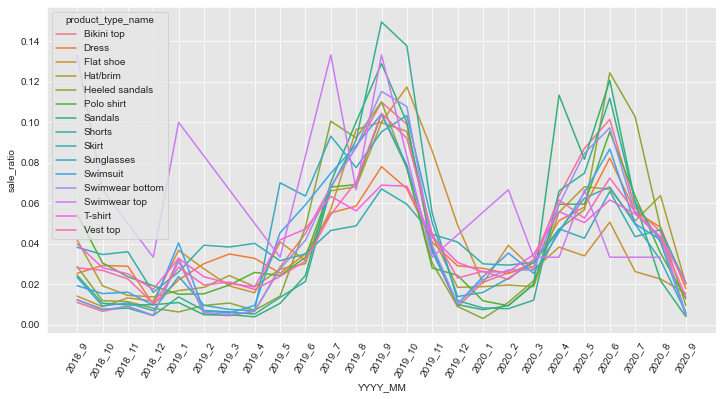

/var/folders/t0/v5mt2fvx40j4y3x7fqgq6kg00000gn/T/ipykernel_13373/705605740.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["YYYY_MM"] = tmp["YYYY_MM"].astype("category")


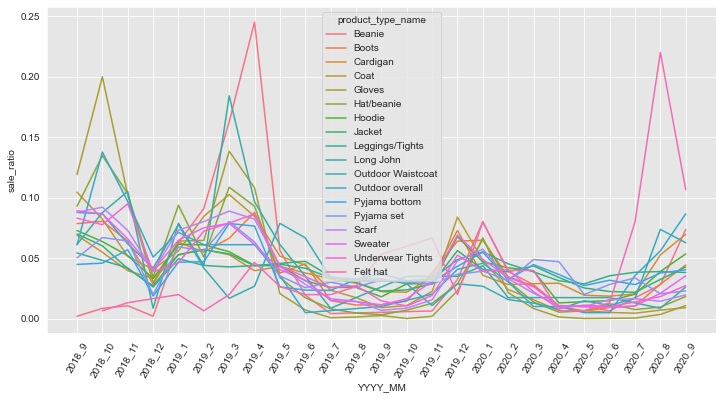

In [41]:
ttl_sale = trans.groupby('product_type_name').size().reset_index(name='ttl_sale')
month_sale = trans.groupby(['YYYY_MM','product_type_name']).size().reset_index(name='month_sale')
month_sale = month_sale.merge(ttl_sale, on=['product_type_name'], how='left')
month_sale['sale_ratio'] = month_sale['month_sale'] / month_sale['ttl_sale']
month_sale['season_type'] = 0
month_sale.loc[month_sale['product_type_name'].isin(summer), 'season_type'] = 1
month_sale.loc[month_sale['product_type_name'].isin(winter), 'season_type'] = 2
for season_type in [1, 2]:
    tmp = month_sale[month_sale["season_type"] == season_type]
    tmp["YYYY_MM"] = tmp["YYYY_MM"].astype("category")
    month = [
        "2018_9",
        "2018_10",
        "2018_11",
        "2018_12",
        "2019_1",
        "2019_2",
        "2019_3",
        "2019_4",
        "2019_5",
        "2019_6",
        "2019_7",
        "2019_8",
        "2019_9",
        "2019_10",
        "2019_11",
        "2019_12",
        "2020_1",
        "2020_2",
        "2020_3",
        "2020_4",
        "2020_5",
        "2020_6",
        "2020_7",
        "2020_8",
        "2020_9",
    ]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="YYYY_MM", y="sale_ratio", data=tmp, hue="product_type_name")
    plt.xticks(range(len(month)), month, rotation=60)
    plt.show()
# for season_type in [1,2]:
#     tmp = week_sale[week_sale['season_type']==season_type]
#     plt.figure(figsize=(12,6))
#     sns.lineplot(x='week', y='sale_ratio', data=tmp, hue='product_type_name')
#     plt.xticks(rotation=60)
#     plt.show()



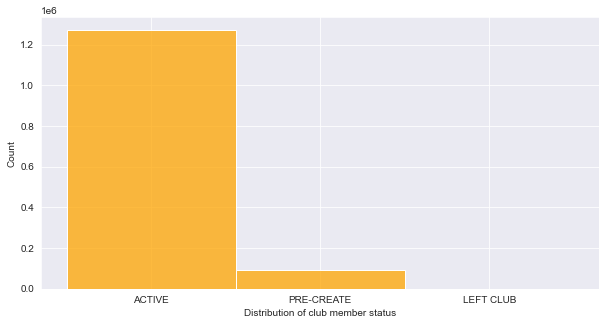

In [42]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()